In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from urllib.request import urlopen
import json
from scipy.stats import ttest_rel
import scipy.stats as sp
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Importing the necessary and unnecessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from numpy import where
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import chi2_contingency
from scipy import stats as st      
from sklearn import metrics
from IPython.display import display
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_decision_regions


##Data Cleaning

In [ ]:
#Read Data
df=pd.read_csv('/content/LV_reduced_041605_finalcsv.csv')
df.head(10)

,loan_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,mo_sin_rcnt_tl,num_accts_ever_120_pd,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bc_limit
0,Fully Paid,28000,5.32,843.22,A,A1,9 years,MORTGAGE,140000.0,Source Verified,...,16,0,7,7,0,0,22.2,0,457375,94900
1,Fully Paid,6150,13.33,208.20,C,C3,6 years,RENT,40000.0,Source Verified,...,9,2,3,3,0,1,50.0,0,33161,700
2,Fully Paid,7200,14.99,249.56,C,C5,3 years,RENT,20000.0,Source Verified,...,20,0,6,6,0,0,75.0,0,21400,13600
3,Fully Paid,4750,15.31,165.39,C,C4,NaN,MORTGAGE,30000.0,Verified,...,13,1,3,2,3,0,100.0,1,85964,500
4,Fully Paid,5000,12.69,167.73,C,C2,1 year,MORTGAGE,27000.0,Verified,...,4,0,6,6,0,6,0.0,1,171142,2500
5,Fully Paid,9600,14.98,332.70,C,C3,10+ years,MORTGAGE,48500.0,Verified,...,2,0,5,5,0,4,100.0,0,226976,13000
6,Fully Paid,1600,13.33,54.17,C,C3,10+ years,RENT,50000.0,Verified,...,1,0,3,3,0,2,100.0,0,28900,5600
7,Fully Paid,12000,10.99,392.81,B,B2,< 1 year,MORTGAGE,65000.0,Source Verified,...,4,0,4,4,0,1,66.7,0,202731,23000
8,Fully Paid,25000,15.31,870.44,C,C2,10+ years,MORTGAGE,98000.0,Verified,...,8,6,8,8,6,2,100.0,0,309453,23700
9,Fully Paid,4800,12.69,161.02,C,C2,< 1 year,MORTGAGE,100000.0,Not Verified,...,11,0,4,4,0,1,100.0,0,313935,19100


In [ ]:
#Remove columns/rows that has too many NA
#Remove columns whose NA is more than 70%
#Remove rows whose NA is more than 30
null_rate = df.isnull().sum(axis = 0).sort_values(ascending = False)/float((len(df)))
null_rate[null_rate > 0.7]
df.drop(null_rate[null_rate>0.7].index,axis = 1,inplace=True)
#Find out the columns that has too few/ too much unique data
unique_rate = df.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) #unique rate and sort
unique_rate

tot_cur_bal              80199
tot_hi_cred_lim          76534
revol_bal                35262
avg_cur_bal              33351
installment              21087
annual_inc                8834
total_rev_hi_lim          4779
dti                       3974
total_bc_limit            3161
loan_amnt                 1270
revol_util                1097
int_rate                   194
percent_bc_gt_75           150
mo_sin_rcnt_tl             128
open_acc                    57
num_actv_rev_tl             38
num_rev_tl_bal_gt_0         36
sub_grade                   35
num_tl_op_past_12m          26
delinq_2yrs                 21
num_accts_ever_120_pd       21
num_tl_90g_dpd_24m          19
purpose                     13
emp_length                  12
pub_rec_bankruptcies         9
grade                        7
acc_now_delinq               5
home_ownership               3
verification_status          3
loan_status                  2
dtype: int64

In [ ]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['loan_amnt'])
#Dropping all NA
df.dropna()
#One-Hot encoding on categorical features by getting dummies variables 

#cat_features = ['grade','sub_grade', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title','initial_list_status', 'debt_settlement_flag']   
df.dropna(axis=0, how = 'any', inplace = True) #drop all records that contains NA
one_hot_encoded_data = pd.get_dummies(df, columns =['grade','sub_grade', 'grade', 'emp_length', 'home_ownership', 'verification_status', 
                'loan_status', 'purpose'])
#one_hot_encoded_data

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,acc_now_delinq,...,num_accts_ever_120_pd,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bc_limit,LoanAmount_log
count,92904.000000,92904.000000,92904.000000,9.290400e+04,92904.000000,92904.000000,92904.000000,92904.000000,92904.000000,92904.000000,...,92904.000000,92904.000000,92904.000000,92904.000000,92904.000000,92904.000000,92904.000000,9.290400e+04,92904.000000,92904.000000
mean,12940.472423,11.947863,428.299730,7.513352e+04,17.808568,0.336347,11.555068,16076.387228,53.925455,0.005705,...,0.491228,5.701606,5.663341,0.091912,2.053905,48.140584,0.130823,1.626481e+05,20616.587251,9.268733
std,7947.739335,3.861441,264.509811,7.379467e+04,8.215342,0.900863,5.312855,21494.922926,23.491289,0.083063,...,1.258316,3.176457,3.118002,0.495767,1.729784,35.570571,0.374792,1.709156e+05,20936.522604,0.665565
min,1000.000000,5.320000,30.120000,6.000000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+02,200.000000,6.907755
25%,7000.000000,8.900000,233.740000,4.500000e+04,11.590000,0.000000,8.000000,6041.750000,36.500000,0.000000,...,0.000000,3.000000,3.000000,0.000000,1.000000,16.700000,0.000000,4.485050e+04,7200.000000,8.853665
50%,10500.000000,11.990000,356.300000,6.300000e+04,17.240000,0.000000,11.000000,10944.000000,54.300000,0.000000,...,0.000000,5.000000,5.000000,0.000000,2.000000,50.000000,0.000000,9.710600e+04,14000.000000,9.259131
75%,17400.000000,14.330000,568.640000,9.000000e+04,23.650000,0.000000,14.000000,19258.000000,72.000000,0.000000,...,0.000000,7.000000,7.000000,0.000000,3.000000,75.000000,0.000000,2.343365e+05,26500.000000,9.764225
max,35000.000000,28.490000,1407.010000,8.500021e+06,44.330000,21.000000,79.000000,924579.000000,153.700000,4.000000,...,23.000000,41.000000,36.000000,20.000000,26.000000,100.000000,8.000000,3.647089e+06,332200.000000,10.463103


In [ ]:
df['grade'].unique()
df['sub_grade'].unique()
df['emp_length'].unique()
df['home_ownership'].unique()
df['purpose'].unique()
df['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [ ]:
df['loan_status'].replace(['Fully Paid','Charged Off'],[1,0], inplace=True)
df['grade'].replace(['A', 'C', 'B', 'D', 'E', 'F', 'G'],[1,2,3,4,5,6,7], inplace=True)
df['sub_grade'].replace(['A1', 'C3', 'C5', 'C2', 'B2', 'C1', 'A4', 'B4', 'C4', 'D1', 'A2',
       'D2', 'B1', 'D3', 'B5', 'E4', 'A5', 'B3', 'A3', 'D4', 'E3', 'D5',
       'F4', 'E1', 'F1', 'E5', 'E2', 'F3', 'F2', 'F5', 'G2', 'G3', 'G5',
       'G1', 'G4'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,27,29,30,31,32,33,34,35], inplace=True)
df['emp_length'].replace(['9 years', '6 years', '3 years', '1 year', '10+ years', '< 1 year',
       '4 years', '2 years', '7 years', '5 years', '8 years'],[9,6,3,1,10,1,4,2,7,5,8], inplace=True)
df['home_ownership'].replace(['MORTGAGE','RENT', 'OWN'],[1,2,3], inplace=True)
df['purpose'].replace(['credit_card', 'debt_consolidation', 'other', 'home_improvement',
       'small_business', 'major_purchase', 'moving', 'medical',
       'vacation', 'car', 'house', 'wedding', 'renewable_energy'],[1,2,3,4,5,6,7,8,9,10,11,12,13], inplace=True)
df['verification_status'].replace(['Source Verified', 'Verified', 'Not Verified'],[1,2,3], inplace=True)

df


,loan_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_accts_ever_120_pd,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bc_limit,LoanAmount_log
0,1,28000,5.32,843.22,1,1,9,1,140000.0,1,...,0,7,7,0,0,22.2,0,457375,94900,10.239960
1,1,6150,13.33,208.20,2,2,6,2,40000.0,1,...,2,3,3,0,1,50.0,0,33161,700,8.724207
2,1,7200,14.99,249.56,2,3,3,2,20000.0,1,...,0,6,6,0,0,75.0,0,21400,13600,8.881836
4,1,5000,12.69,167.73,2,4,1,1,27000.0,2,...,0,6,6,0,6,0.0,1,171142,2500,8.517193
5,1,9600,14.98,332.70,2,2,10,1,48500.0,2,...,0,5,5,0,4,100.0,0,226976,13000,9.169518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,25450,15.61,889.86,2,2,10,1,60000.0,2,...,0,6,6,0,1,80.0,0,258840,10000,10.144471
99995,1,10000,14.33,343.39,2,3,7,2,32000.0,2,...,0,8,8,0,1,62.5,0,34000,29400,9.210340
99997,1,10000,13.98,341.68,2,6,9,1,50000.0,2,...,0,5,5,0,1,100.0,1,204371,5200,9.210340
99998,0,20000,11.99,664.20,3,15,7,1,62000.0,2,...,0,6,6,1,2,20.0,0,169686,42000,9.903488


#Data Analysis-Visualization

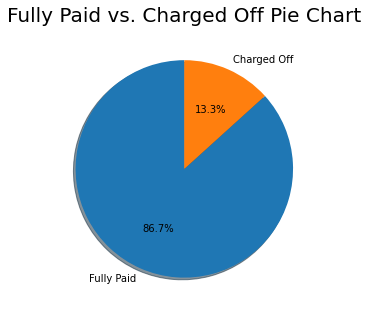

In [ ]:
#Total 'Total Fully Paid' and  Total Charged Off pie chart.

df['loan_status'].replace({0:"Charged Off", 1:"Fully Paid"},inplace = True)
loangroup=df['loan_status'].value_counts()
loangroup.plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(10,5), autopct='%1.1f%%')
plt.ylabel('')
plt.title("Fully Paid vs. Charged Off Pie Chart", y=1.02, fontsize=20)
df['loan_status'].replace(['Fully Paid','Charged Off'],[1,0], inplace=True)


In [ ]:
# Loan approval rates in absolute numbers
loan_approval_f = df['loan_status'].value_counts()['Fully Paid']
loan_approval_c = df['loan_status'].value_counts()['Charged Off']

print('Total Fully Paid',loan_approval_f,'and Total Charged Off',loan_approval_c)

Total Fully Paid 80559 and Total Charged Off 12345


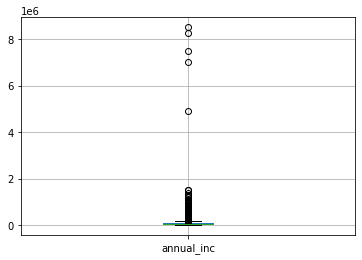

In [ ]:
# Box Plot for understanding the distributions and to observe the outliers.
#%matplotlib inline
# Histogram of variable annual_inc
df.boxplot(column='annual_inc')

The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

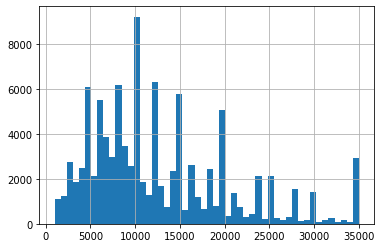

In [ ]:
# Histogram of variable LoanAmount
df['loan_amnt'].hist(bins=50)

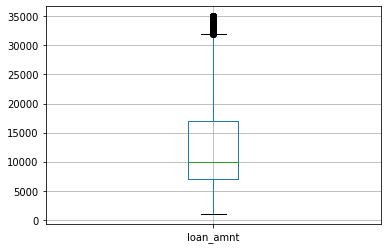

In [ ]:
# Box Plot for variable LoanAmount of training data set
df.boxplot(column='loan_amnt')

In [ ]:
df

,loan_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_accts_ever_120_pd,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bc_limit,LoanAmount_log
0,1,28000,5.32,843.22,1,1,9,1,140000.0,1,...,0,7,7,0,0,22.2,0,457375,94900,10.239960
1,1,6150,13.33,208.20,2,2,6,2,40000.0,1,...,2,3,3,0,1,50.0,0,33161,700,8.724207
2,1,7200,14.99,249.56,2,3,3,2,20000.0,1,...,0,6,6,0,0,75.0,0,21400,13600,8.881836
4,1,5000,12.69,167.73,2,4,1,1,27000.0,2,...,0,6,6,0,6,0.0,1,171142,2500,8.517193
5,1,9600,14.98,332.70,2,2,10,1,48500.0,2,...,0,5,5,0,4,100.0,0,226976,13000,9.169518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,25450,15.61,889.86,2,2,10,1,60000.0,2,...,0,6,6,0,1,80.0,0,258840,10000,10.144471
99995,1,10000,14.33,343.39,2,3,7,2,32000.0,2,...,0,8,8,0,1,62.5,0,34000,29400,9.210340
99997,1,10000,13.98,341.68,2,6,9,1,50000.0,2,...,0,5,5,0,1,100.0,1,204371,5200,9.210340
99998,0,20000,11.99,664.20,3,15,7,1,62000.0,2,...,0,6,6,1,2,20.0,0,169686,42000,9.903488


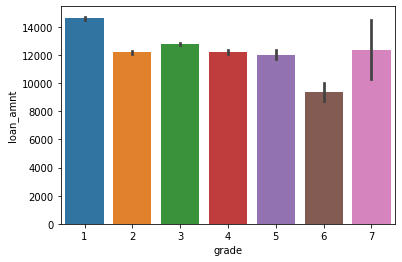

In [ ]:
#Plot of Total Grade vs. Loan Amount.
ax=sns.barplot(x="grade",y="loan_amnt",data=df)

Average of Grade vs. Loan Amount:
    grade     loan_amnt
0      1  14625.729697
1      2  12214.451056
2      3  12793.972603
3      4  12197.269353
4      5  12008.583255
5      6   9365.155229
6      7  12389.130435


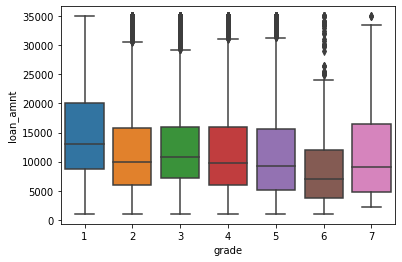

In [ ]:
#Plot of Average of Grade vs. Loan Amount.
print('Average of Grade vs. Loan Amount:\n', df.groupby('grade', as_index=False)['loan_amnt'].mean())
sns.boxplot(x=df['grade'],y=df['loan_amnt'])


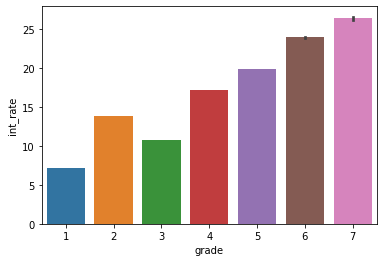

In [ ]:
#Plot of Total Grade vs. Interest Rate.
ax=sns.barplot(x="grade",y="int_rate",data=df)

Average of Grade vs. Interest Rate:
    grade   int_rate
0      1   7.176238
1      2  13.850731
2      3  10.756105
3      4  17.196531
4      5  19.928219
5      6  24.017418
6      7  26.453333


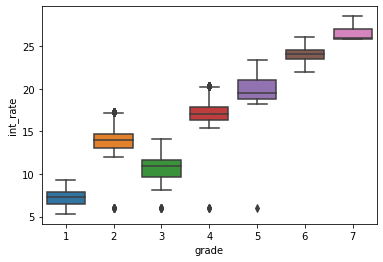

In [ ]:
#Plot of Average of Grade vs. Interest Rate.
print('Average of Grade vs. Interest Rate:\n', df.groupby('grade', as_index=False)['int_rate'].mean())
sns.boxplot(x=df['grade'],y=df['int_rate'])

# Data Analysis -Corelation

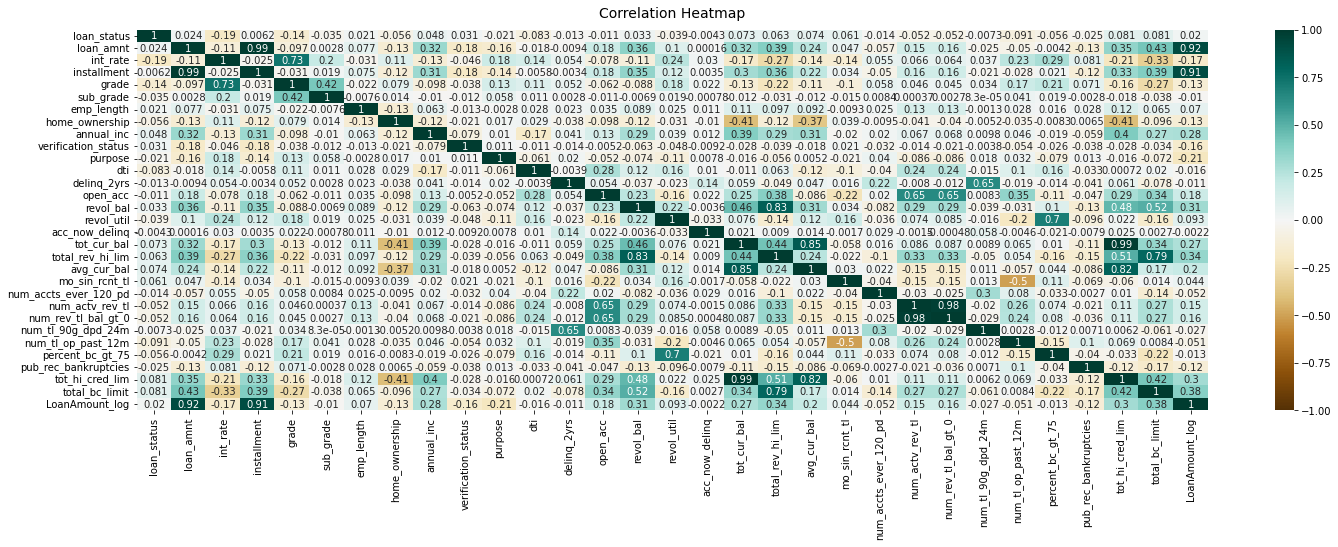

In [ ]:
#Heatmap: Visualize the Correlation 
plt.figure(figsize=(24, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
df2 = df.drop(columns=['installment','int_rate','revol_bal','avg_cur_bal',
'LoanAmount_log',
'percent_bc_gt_75',
'total_rev_hi_lim',
'tot_cur_bal',
'num_rev_tl_bal_gt_0'])

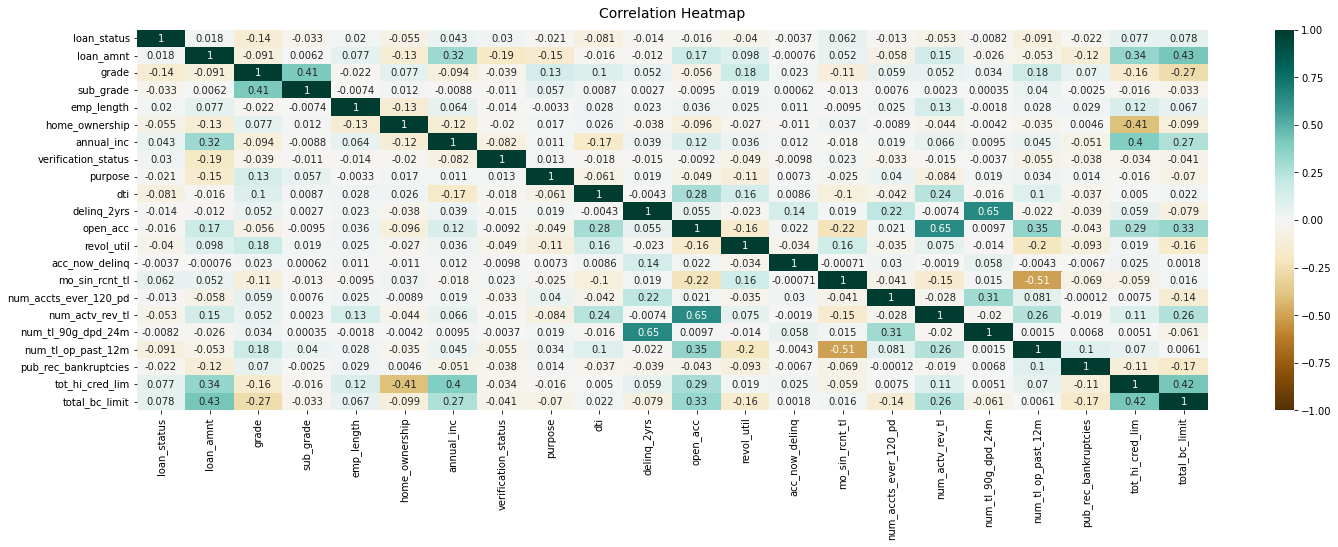

In [ ]:

#Heatmap: Visualize the Correlation  for DF2
plt.figure(figsize=(24, 7))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_status            100000 non-null  int64  
 1   loan_amnt              100000 non-null  int64  
 2   grade                  100000 non-null  int64  
 3   sub_grade              100000 non-null  int64  
 4   emp_length             93852 non-null   float64
 5   home_ownership         100000 non-null  int64  
 6   annual_inc             100000 non-null  float64
 7   verification_status    100000 non-null  int64  
 8   purpose                100000 non-null  int64  
 9   dti                    100000 non-null  float64
 10  delinq_2yrs            100000 non-null  int64  
 11  open_acc               100000 non-null  int64  
 12  revol_util             99959 non-null   float64
 13  acc_now_delinq         100000 non-null  int64  
 14  mo_sin_rcnt_tl         100000 non-nul

# Splitting in Training and Testing Data

In [ ]:
#Startified train test Split-out dataset
from sklearn.model_selection import train_test_split

features = []
for feature in df2.columns:
    if feature != 'loan_status':
        features.append(feature)
X = df2[features]
Y = df2['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25)


In [ ]:
#Y_test=pd.DataFrame(Y_test)
#Y_test

# Machine Learning Models

##Random Forest

Accuracy on the training data 0.9923361749763197


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


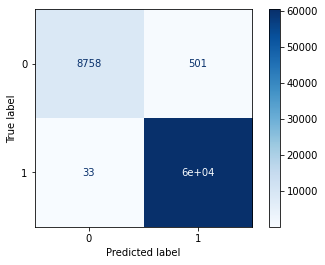

In [ ]:
#Random Forest
#Fitting the Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

forest = RandomForestClassifier(n_estimators=10, random_state=42)
forest.fit(X_train, Y_train)

#the accuracy on the training data
print('Accuracy on the training data',forest.score(X_train,Y_train))

#confusion_matrix for the training
disp = plot_confusion_matrix(forest, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)

Accuracy on the test data 0.8513734607767157
Precision: 0.851
Recall: 0.851
F1 Score: 0.851


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


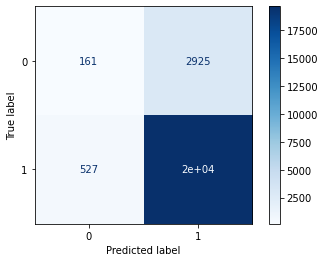

In [ ]:
# Testing the Random Forest Model

#the accuracy on the test data
print('Accuracy on the test data', forest.score(X_test, Y_test))

#Precision, Recall & F1-Score
Y_pred = forest.predict(X_test)
print('Precision: %.3f' % precision_score(Y_test, Y_pred, average='micro'))
print('Recall: %.3f' % recall_score(Y_test, Y_pred, average='micro'))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred, average='micro'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(forest, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

0.594162194837048


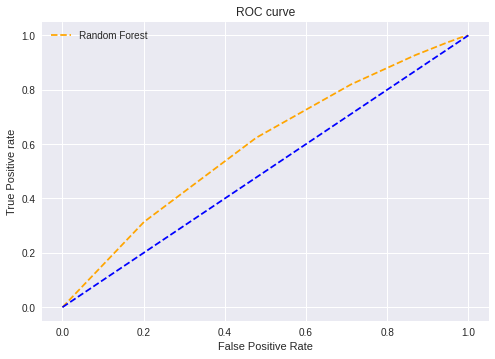

In [ ]:
#ROC curve and AUC value
pred_prob1 = forest.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Desicion Tree

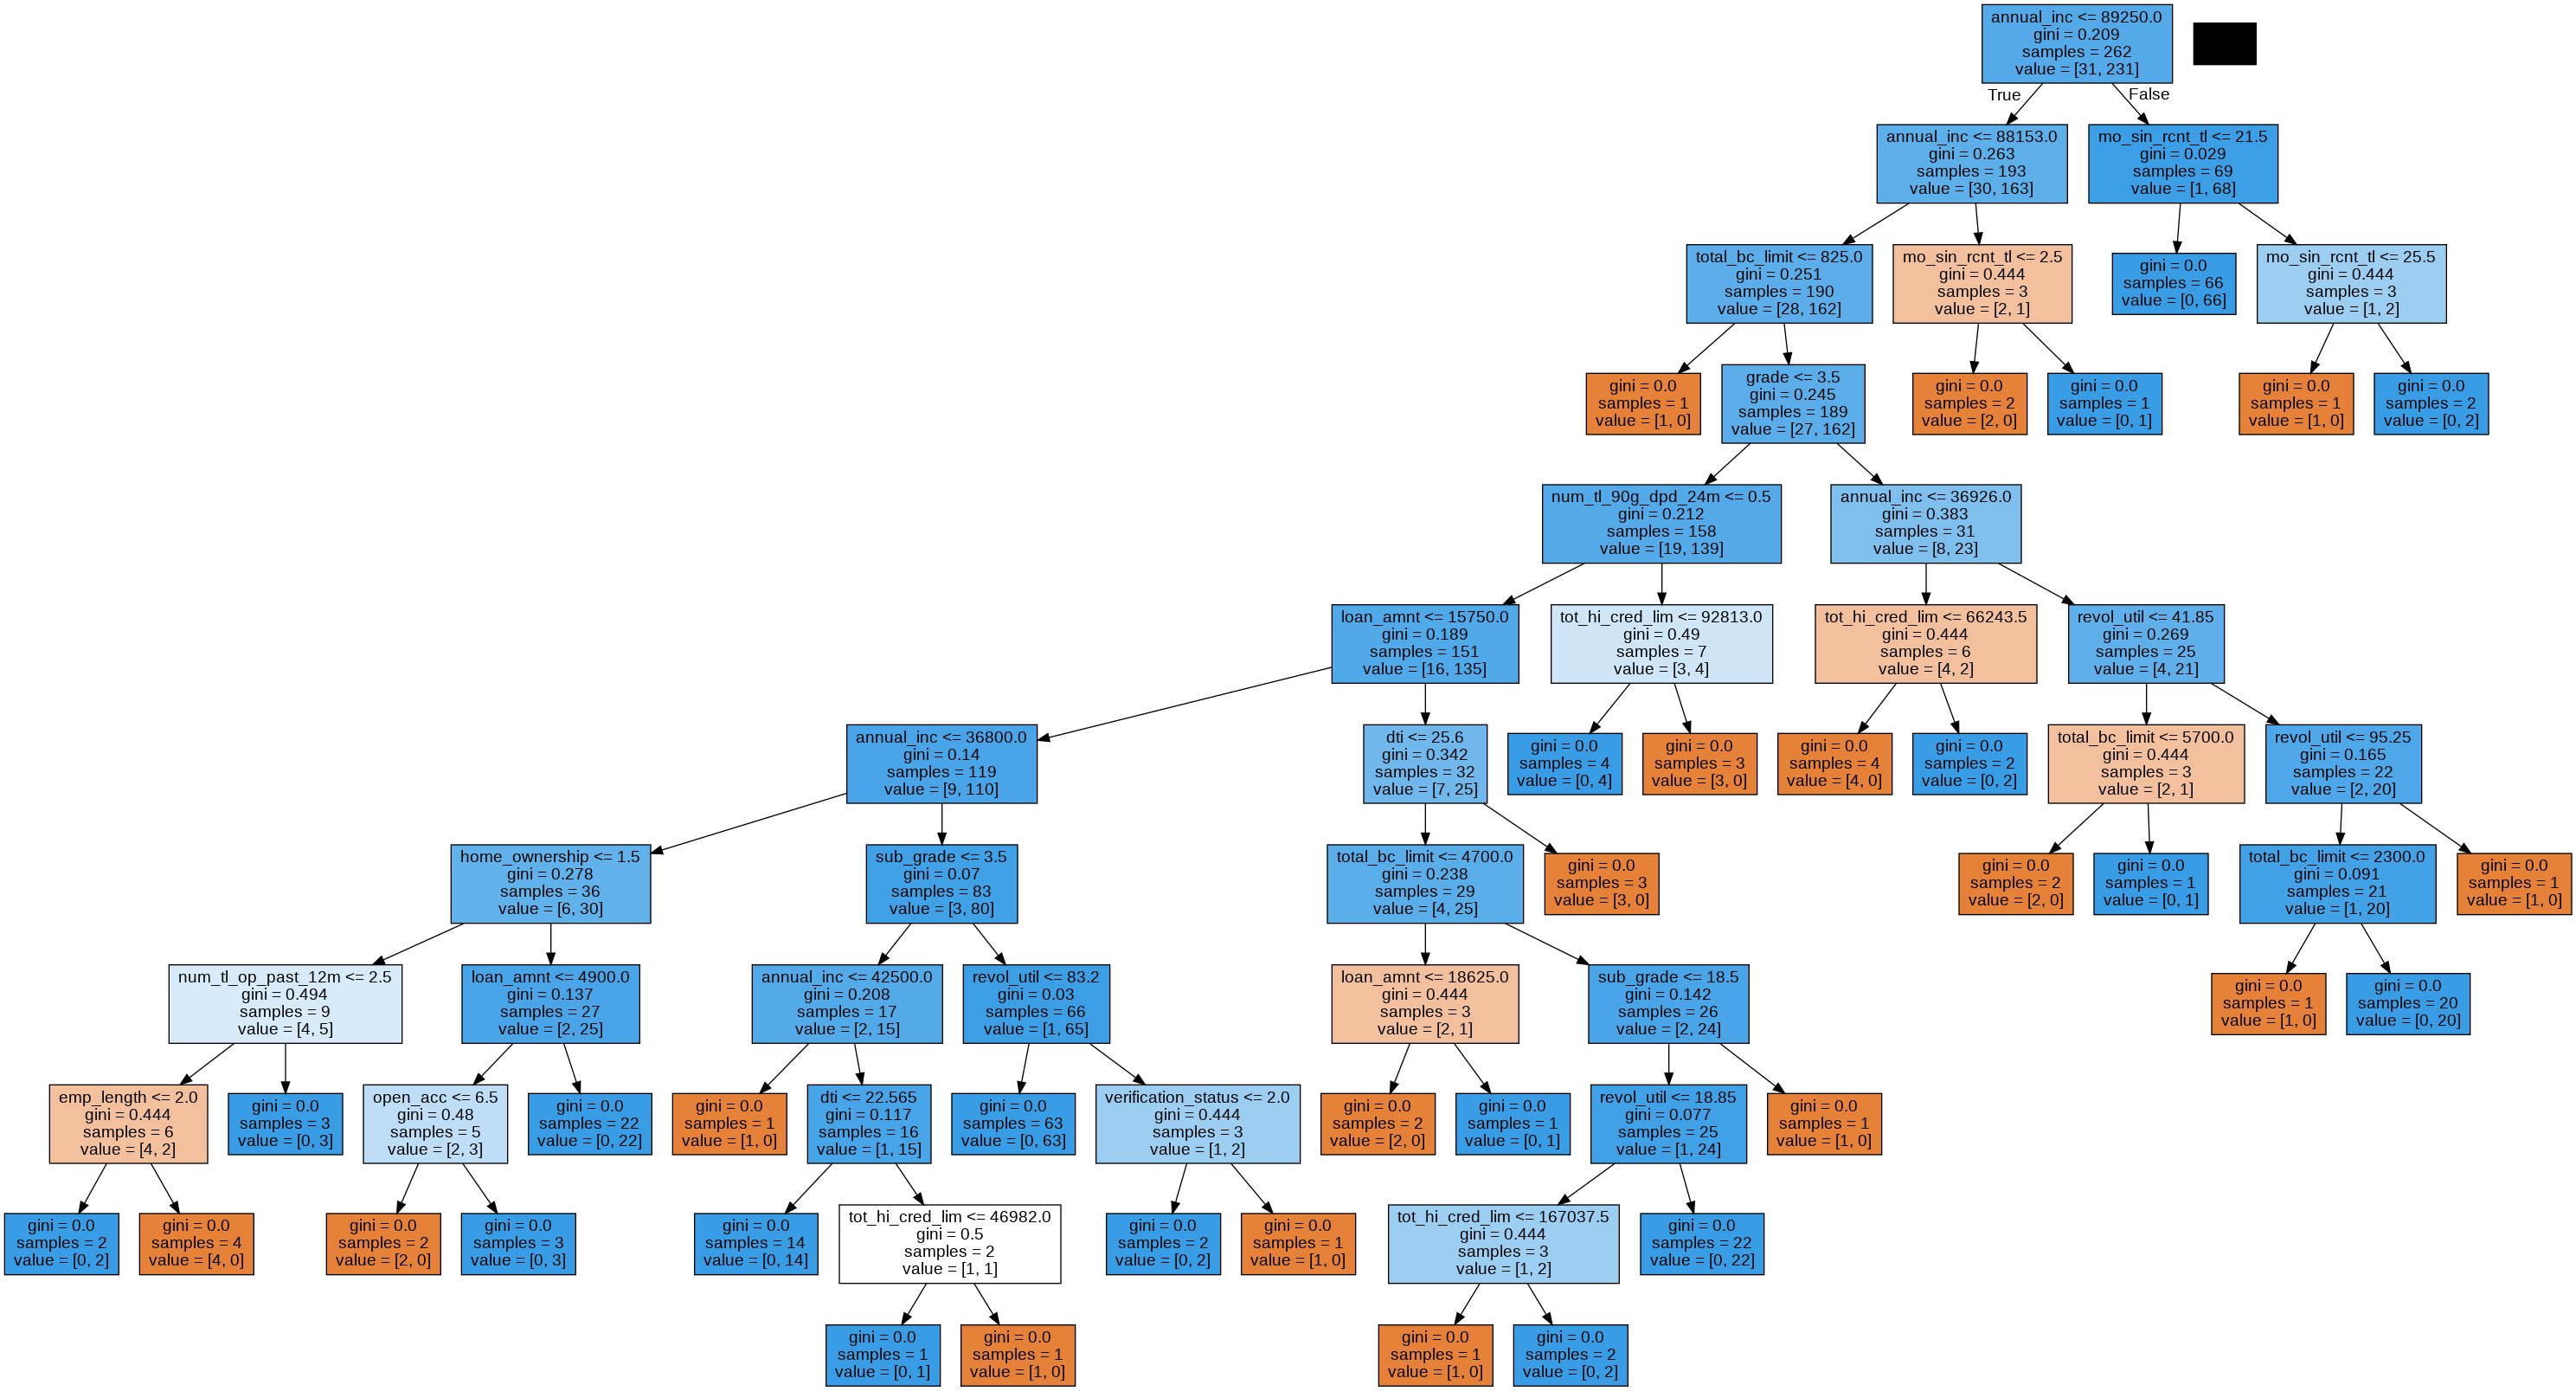

In [ ]:
# Decision Tree 
#Import tools needed for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree_clf = DecisionTreeClassifier(random_state=42)
df3=df2[:350]

features = []
for feature in df3.columns:
    if feature != 'loan_status':
        features.append(feature)
X3 = df3[features]
Y3 = df3['loan_status']

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, stratify=Y3, test_size=0.25)

tree_clf.fit(X_train3, Y_train3)

features = list(X_train3.columns)
#features.remove("loan_status")

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Accuracy on the training data 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


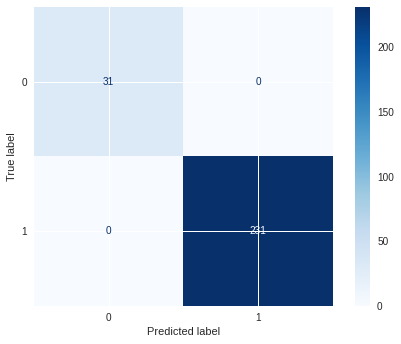

In [ ]:
#the accuracy on the training data
print('Accuracy on the training data',tree_clf.score(X_train3,Y_train3))

#confusion_matrix for the training
disp = plot_confusion_matrix(tree_clf, X_train3, Y_train3 ,display_labels=None, cmap=plt.cm.Blues)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has featur

Accuracy on the test data 0.4090909090909091
Precision: 0.409
Recall: 0.409
F1 Score: 0.409


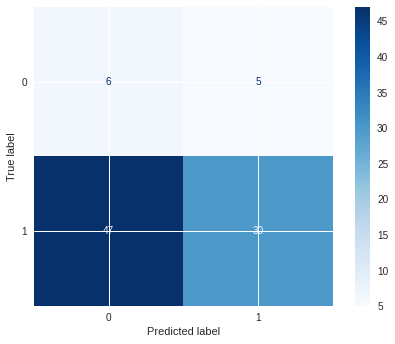

In [ ]:
# Testing the Desicion Tree Model

#the accuracy on the test data
print('Accuracy on the test data', forest.score(X_test3, Y_test3))

#Precision, Recall & F1-Score
Y_pred3 = forest.predict(X_test3)
print('Precision: %.3f' % precision_score(Y_test3, Y_pred3, average='micro'))
print('Recall: %.3f' % recall_score(Y_test3, Y_pred3, average='micro'))
print('F1 Score: %.3f' % f1_score(Y_test3, Y_pred3, average='micro'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(forest, X_test3, Y_test3 ,display_labels=None, cmap=plt.cm.Blues)

0.4415584415584416


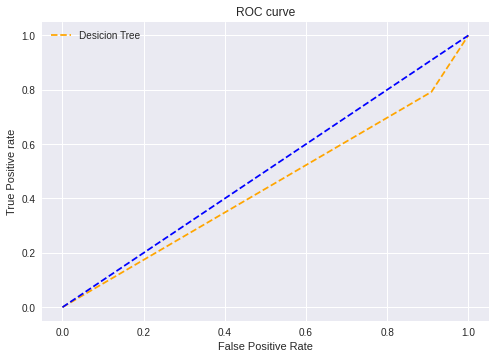

In [ ]:
#ROC curve and AUC value
pred_prob1 = tree_clf.predict_proba(X_test3)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test3, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test3))]
p_fpr, p_tpr, _ = roc_curve(Y_test3, random_probs, pos_label=1)


# auc scores
auc_score1 = roc_auc_score(Y_test3, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Desicion Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

##NAIVE BAYES MODEL


Accuracy for the Naive Bayes Model on the training data 80.8003


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


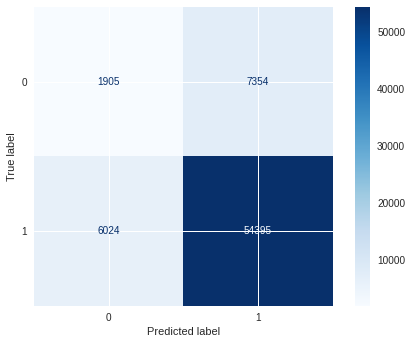

In [ ]:
#Fitting the Naive Bayes Model - Baseline

gnb = GaussianNB().fit(X_train, Y_train)

#accuracy on the training data
gnb_train_acc = gnb.score(X_train,Y_train)
print('Accuracy for the Naive Bayes Model on the training data %.4f' % (gnb_train_acc*100))

#confusion_matrix for the training
disp = plot_confusion_matrix(gnb, X_train, Y_train ,display_labels = None, cmap=plt.cm.Blues)

Accuracy for the Naive Bayes Model on the test data 80.5434
Precision: 0.7975
Recall: 0.8054
F1 Score: 0.8013


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


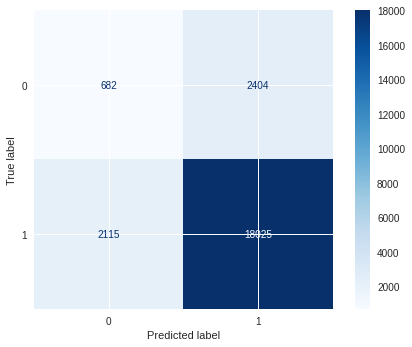

In [ ]:
#Testing the Naive Bayes Model- Baseline

#the accuracy on the test data
gnb_test_acc = gnb.score(X_test,Y_test)
print('Accuracy for the Naive Bayes Model on the test data %.4f' % (gnb_test_acc*100) )

#Precision, Recall & F1-Score
Y_naiveb = gnb.predict(X_test)
print('Precision: %.4f' % precision_score(Y_test, Y_naiveb, average='weighted'))
print('Recall: %.4f' % recall_score(Y_test, Y_naiveb, average='weighted'))
print('F1 Score: %.4f' % f1_score(Y_test, Y_naiveb, average='weighted'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(gnb, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .................var_smoothing=1.0;, score=0.867 total time=   0.1s
[CV 2/3] END .................var_smoothing=1.0;, score=0.867 total time=   0.1s
[CV 3/3] END .................var_smoothing=1.0;, score=0.867 total time=   0.1s
[CV 1/3] END ..var_smoothing=0.4216965034285822;, score=0.867 total time=   0.1s
[CV 2/3] END ..var_smoothing=0.4216965034285822;, score=0.867 total time=   0.1s
[CV 3/3] END ..var_smoothing=0.4216965034285822;, score=0.867 total time=   0.1s
[CV 1/3] END ..var_smoothing=0.1778279410038923;, score=0.867 total time=   0.1s
[CV 2/3] END ..var_smoothing=0.1778279410038923;, score=0.867 total time=   0.1s
[CV 3/3] END ..var_smoothing=0.1778279410038923;, score=0.866 total time=   0.1s
[CV 1/3] END .var_smoothing=0.07498942093324558;, score=0.867 total time=   0.1s
[CV 2/3] END .var_smoothing=0.07498942093324558;, score=0.867 total time=   0.1s
[CV 3/3] END .var_smoothing=0.07498942093324558;

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision: 0.7519
Recall: 0.8671
F1 Score: 0.8054


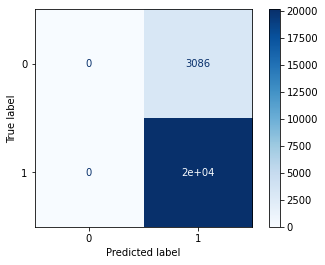

In [ ]:
#Hyperparameter Tuning the Naive Bayes Model

#Create the parameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=25)}

gnb = GaussianNB()

# search of parameters, using 3 fold cross validation, 
# search across 25 different combinations
gnb_random = GridSearchCV(gnb, param_grid, cv = 3, scoring = 'recall_weighted', refit = True, verbose = 3)

# Fit the random search model
gnb_random.fit(X_train, Y_train)

#print best parameters
print(gnb_random.best_params_)

#accuracy for best estimator
bestgnb = gnb_random.best_estimator_
best_gnb_acc = bestgnb.score(X_train,Y_train)
print('Accuracy of the Naive Bayes model data with hyperparameter tuning:  %.4f' % (best_gnb_acc*100))

#Precision, Recall & F1-Score
y_naivebhp = bestgnb.predict(X_test)
print('Precision: %.4f' % precision_score(Y_test, y_naivebhp, average='weighted'))
print('Recall: %.4f' % recall_score(Y_test, y_naivebhp, average='weighted'))
print('F1 Score: %.4f' % f1_score(Y_test, y_naivebhp, average='weighted'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(bestgnb, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


0.635915763987795


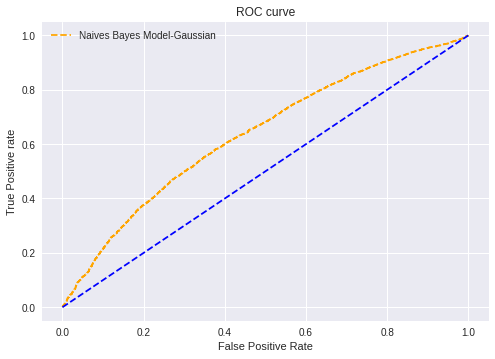

In [ ]:
#ROC curve and AUC value
pred_prob1 = gnb.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naives Bayes Model-Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

##K-NEAREST NEIGHBOR (KNN) MODEL

Accuracy for the KNeighborsClassifier on the training data 87.4193


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


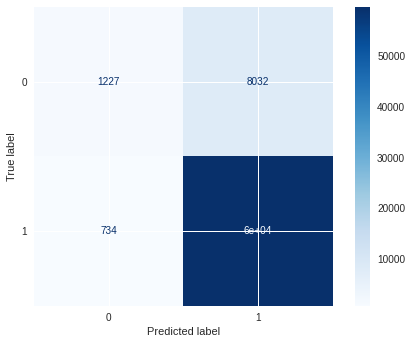

In [ ]:
#Fitting the KNN moel - Baseline

knn = KNeighborsClassifier().fit(X_train, Y_train)

#accuracy on the training data
knn_train_acc = knn.score(X_train,Y_train)
print('Accuracy for the KNeighborsClassifier on the training data %.4f'  % (knn_train_acc*100))

#confusion_matrix for the training
disp = plot_confusion_matrix(knn, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)

Accuracy for the KNeighborsClassifier on the testing data 85.4603
Precision: 0.7880
Recall: 0.8546
F1 Score: 0.8093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


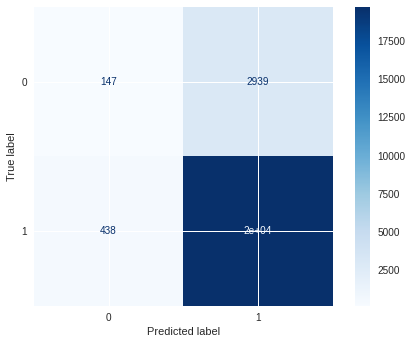

In [ ]:
# Testing the KNN Model- Baseline

#the accuracy on the test data
knn_test_acc = knn.score(X_test,Y_test)
print('Accuracy for the KNeighborsClassifier on the testing data %.4f'  % (knn_test_acc*100))

#Precision, Recall & F1-Score
Y_KNN = knn.predict(X_test)
print('Precision: %.4f' % precision_score(Y_test, Y_KNN, average='weighted'))
print('Recall: %.4f' % recall_score(Y_test, Y_KNN, average='weighted'))
print('F1 Score: %.4f' % f1_score(Y_test, Y_KNN, average='weighted'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(knn, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .....................n_neighbors=5;, score=0.852 total time=  23.4s
[CV 2/3] END .....................n_neighbors=5;, score=0.852 total time=  24.0s
[CV 3/3] END .....................n_neighbors=5;, score=0.854 total time=  23.3s
[CV 1/3] END ....................n_neighbors=10;, score=0.861 total time=  23.2s
[CV 2/3] END ....................n_neighbors=10;, score=0.860 total time=  24.7s
[CV 3/3] END ....................n_neighbors=10;, score=0.862 total time=  23.7s
[CV 1/3] END ....................n_neighbors=15;, score=0.867 total time=  24.0s
[CV 2/3] END ....................n_neighbors=15;, score=0.866 total time=  24.0s
[CV 3/3] END ....................n_neighbors=15;, score=0.866 total time=  35.3s
[CV 1/3] END ....................n_neighbors=20;, score=0.867 total time=  33.8s
[CV 2/3] END ....................n_neighbors=20;, score=0.867 total time=  33.1s
[CV 3/3] END ....................n_neighbors=20;,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


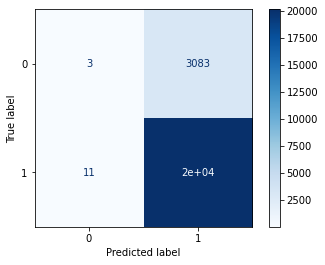

In [ ]:
#Hyperparameter Tuning the KNN Model
#Create the parameter grid
param_grid = {'n_neighbors' : [5,10,15,20]}

knn = KNeighborsClassifier()

# search of parameters, using 3 fold cross validation, 
# search across 4 different combinations
knn_random = GridSearchCV(knn, param_grid, cv = 3, scoring = 'recall_weighted', refit = True, verbose = 3)

# Fit the random search model
knn_random.fit(X_train, Y_train)

#print best parameters
print('The best parameters: ', knn_random.best_params_)

#accuracy for best estimator
bestknn = knn_random.best_estimator_
best_knn_acc = bestknn.score(X_train,Y_train)
print('Accuracy of the KNN model with hyperparameter tuning:  %.4f' % (best_knn_acc*100))

#Precision, Recall & F1-Score
Y_knnhp = bestknn.predict(X_test)
print('Precision: %.4f' % precision_score(Y_test, Y_knnhp, average='weighted'))
print('Recall: %.4f' % recall_score(Y_test, Y_knnhp, average='weighted'))
print('F1 Score: %.4f' % f1_score(Y_test, Y_knnhp, average='weighted'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(bestknn, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


0.5747418829695694


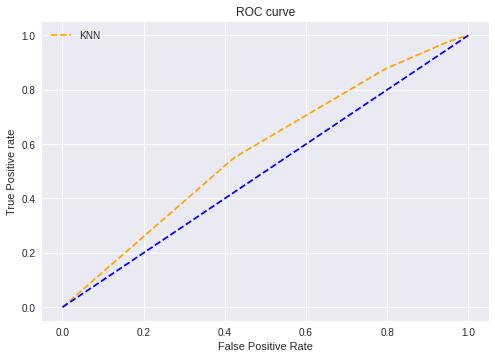

In [ ]:
#ROC curve and AUC value
pred_prob1 = knn.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Plotting decision regions


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'KNN Decision Region Boundary for Loan Status vs grade and sub_grade')

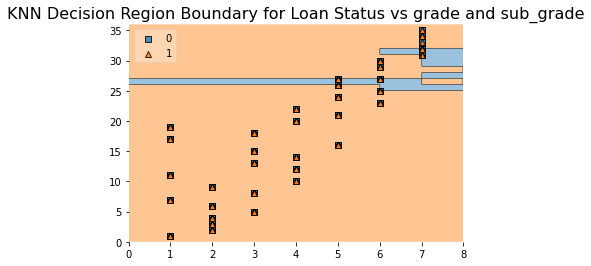

In [ ]:
# Plotting decision regions between grade ,subgrade and loan status
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

X_train_subset = X_train[['grade','sub_grade']]
X_train_array=np.array(X_train_subset)
Y_train_array=np.array(Y_train)
knn = KNeighborsClassifier().fit(X_train_array, Y_train_array)

plot_decision_regions(X_train_array, Y_train_array, clf=knn, legend=2)
plt.title('KNN Decision Region Boundary for Loan Status vs grade and sub_grade', size=16)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'KNN Decision Region Boundary for Loan Status vs Grade')

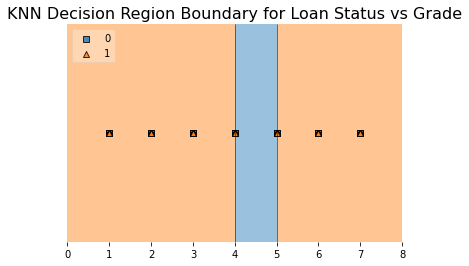

In [ ]:
# Plotting decision regions between grade ,subgrade and loan status
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

X_train_subset = X_train[['grade']]
X_train_array=np.array(X_train_subset)
Y_train_array=np.array(Y_train)
knn = KNeighborsClassifier().fit(X_train_array, Y_train_array)

plot_decision_regions(X_train_array, Y_train_array, clf=knn, legend=2)
plt.title('KNN Decision Region Boundary for Loan Status vs Grade', size=16)

##LOGISTIC REGRESSION

Accuracy for the Logistic Regression model on the training data 86.7103


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


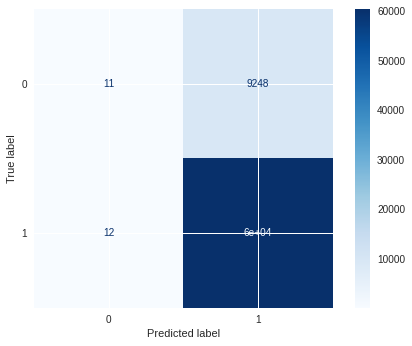

In [ ]:
#Fitting the Regression moel - Baseline
logistic = LogisticRegression(solver='liblinear', max_iter = 1000).fit(X_train, Y_train)
logistic_train_acc = logistic.score(X_train,Y_train)
print('Accuracy for the Logistic Regression model on the training data %.4f' % (logistic_train_acc*100))
#confusion_matrix for the training
disp = plot_confusion_matrix(logistic, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)

#Coefficients
#pd.DataFrame(zip(X_train.columns, np.transpose(logistic.coef_.tolist()[0])), columns=['features', 'coef'])

Accuracy for the Logistic Regression model on the test data 86.6959
Precision: 0.7918
Recall: 0.8670
F1 Score: 0.8056


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


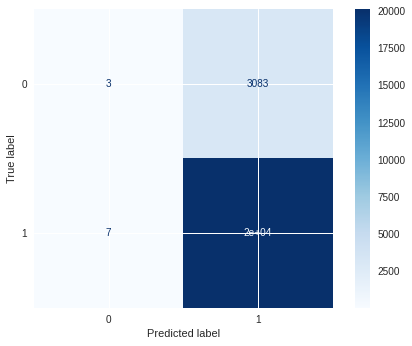

In [ ]:
# Testing the logistic Regression Model - Baseline

#the accuracy on the test data
logistic_test_acc = logistic.score(X_test,Y_test)
print('Accuracy for the Logistic Regression model on the test data %.4f' % (logistic_test_acc*100))

#Precision, Recall & F1-Score
Y_logi = logistic.predict(X_test)
print('Precision: %.4f' % precision_score(Y_test, Y_logi, average='weighted'))
print('Recall: %.4f' % recall_score(Y_test, Y_logi, average='weighted'))
print('F1 Score: %.4f' % f1_score(Y_test, Y_logi, average='weighted'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(logistic, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END ...........C=0.1, solver=newton-cg;, score=0.867 total time=  48.9s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END ...........C=0.1, solver=newton-cg;, score=0.867 total time=  50.8s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END ...........C=0.1, solver=newton-cg;, score=0.867 total time=  52.3s
[CV 1/3] END ...............C=0.1, solver=lbfgs;, score=0.867 total time=   1.5s
[CV 2/3] END ...............C=0.1, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 3/3] END ...............C=0.1, solver=lbfgs;, score=0.867 total time=   2.5s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END ...........C=0.2, solver=newton-cg;, score=0.867 total time=  58.3s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END ...........C=0.2, solver=newton-cg;, score=0.867 total time=  47.9s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END ...........C=0.2, solver=newton-cg;, score=0.867 total time=  57.3s
[CV 1/3] END ...............C=0.2, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 2/3] END ...............C=0.2, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 3/3] END ...............C=0.2, solver=lbfgs;, score=0.867 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END ...........C=0.4, solver=newton-cg;, score=0.867 total time=  53.5s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END ...........C=0.4, solver=newton-cg;, score=0.867 total time=  45.2s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END ...........C=0.4, solver=newton-cg;, score=0.867 total time=  54.6s
[CV 1/3] END ...............C=0.4, solver=lbfgs;, score=0.867 total time=   1.5s
[CV 2/3] END ...............C=0.4, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 3/3] END ...............C=0.4, solver=lbfgs;, score=0.867 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END ...........C=0.8, solver=newton-cg;, score=0.867 total time=  50.4s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END ...........C=0.8, solver=newton-cg;, score=0.867 total time=  58.1s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END ...........C=0.8, solver=newton-cg;, score=0.867 total time=  47.3s
[CV 1/3] END ...............C=0.8, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 2/3] END ...............C=0.8, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 3/3] END ...............C=0.8, solver=lbfgs;, score=0.867 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END ...........C=1.0, solver=newton-cg;, score=0.867 total time=  53.5s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END ...........C=1.0, solver=newton-cg;, score=0.867 total time=  56.5s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END ...........C=1.0, solver=newton-cg;, score=0.867 total time=  52.2s
[CV 1/3] END ...............C=1.0, solver=lbfgs;, score=0.867 total time=   1.5s
[CV 2/3] END ...............C=1.0, solver=lbfgs;, score=0.867 total time=   1.4s
[CV 3/3] END ...............C=1.0, solver=lbfgs;, score=0.867 total time=   2.6s
The best parameters:  {'C': 0.1, 'solver': 'lbfgs'}
Accuracy of the Logistic Regression model with hyperparameter tuning:  86.7117
Precision: 0.7519
Recall: 0.8671
F1 Score: 0.8054


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


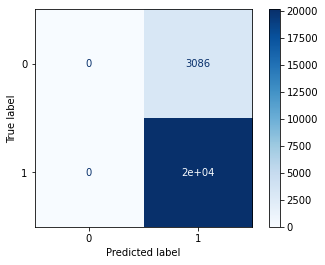

In [ ]:
#Hyperparameter Tuning the logistic regression Model
#Create the parameter grid
param_grid = {'solver':['newton-cg', 'lbfgs'],
              'C': [0.1,0.2,0.4,0.8,1.0]}

LR = LogisticRegression(multi_class='multinomial', max_iter = 1000)

# search of parameters, using 3 fold cross validation, 
# search across 12 different combinations
LR_random = GridSearchCV(LR, param_grid, cv = 3, scoring = "recall_weighted", refit = True, verbose = 3)

# Fit the random search model
LR_random.fit(X_train, Y_train)

#print best parameters
print('The best parameters: ', LR_random.best_params_)

#accuracy for best estimator
bestlogistic = LR_random.best_estimator_
best_logistic_acc = bestlogistic.score(X_train,Y_train)
print('Accuracy of the Logistic Regression model with hyperparameter tuning:  %.4f' % (best_logistic_acc*100))
#Precision, Recall & F1-Score
Y_logihp = bestlogistic.predict(X_test)
print('Precision: %.4f' % precision_score(Y_test, Y_logihp, average='weighted'))
print('Recall: %.4f' % recall_score(Y_test, Y_logihp, average='weighted'))
print('F1 Score: %.4f' % f1_score(Y_test, Y_logihp, average='weighted'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(bestlogistic, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


0.6636990354620701


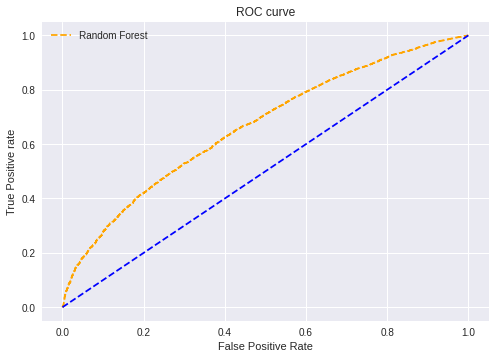

In [ ]:
#ROC curve and AUC value
pred_prob1 = logistic.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

###Statistics - LogisticRegression 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92904 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_status            92904 non-null  int64  
 1   loan_amnt              92904 non-null  int64  
 2   grade                  92904 non-null  int64  
 3   sub_grade              92904 non-null  int64  
 4   emp_length             92904 non-null  int64  
 5   home_ownership         92904 non-null  int64  
 6   annual_inc             92904 non-null  float64
 7   verification_status    92904 non-null  int64  
 8   purpose                92904 non-null  int64  
 9   dti                    92904 non-null  float64
 10  delinq_2yrs            92904 non-null  int64  
 11  open_acc               92904 non-null  int64  
 12  revol_util             92904 non-null  float64
 13  acc_now_delinq         92904 non-null  int64  
 14  mo_sin_rcnt_tl         92904 non-null  int64  
 15  nu

In [ ]:
#Evaluation of Logistic Regression
import statsmodels.formula.api as smf
import seaborn as sns
model= smf.logit(formula="loan_status~ loan_amnt + grade + sub_grade + emp_length + home_ownership + annual_inc + verification_status + purpose + dti + delinq_2yrs + open_acc + revol_util + acc_now_delinq + mo_sin_rcnt_tl + num_accts_ever_120_pd + num_actv_rev_tl + num_tl_90g_dpd_24m + num_tl_op_past_12m + pub_rec_bankruptcies + tot_hi_cred_lim + total_bc_limit", data= df2).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.372358
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                92904
Model:                          Logit   Df Residuals:                    92882
Method:                           MLE   Df Model:                           21
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                 0.04968
Time:                        17:58:34   Log-Likelihood:                -34594.
converged:                       True   LL-Null:                       -36402.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.0962      0.071     43.531      0.000       2.957       3.236
loan_amnt             -1.581e-05   1.57e-06    -10.059      0.000   -1.89e-05   -1.27e-05
grade                    -0.2701      0.012    -23.328      0.000      -0.293      -0.247
sub_grade                 0.0136      0.002      7.360      0.000       0.010       0.017
emp_length                0.0143      0.003      4.987      0.000       0.009       0.020
home_ownership           -0.1100      0.017     -6.527      0.000      -0.143      -0.077
annual_inc             1.172e-06   3.37e-07      3.477      0.001    5.11e-07    1.83e-06
verification_status       0.0684      0.012      5.655      0.000       0.045       0.092
purpose                  -0.0272      0.006     -4.626      0.000      -0.039      -0.016
dti                      -0.0191      0.001    -14.124      0.000      -0.022      -0.016
delinq_2yrs              -0.0643      0.014     -4.640      0.000      -0.092      -0.037
open_acc                  0.0075      0.003      2.604      0.009       0.002       0.013
revol_util               -0.0032      0.001     -6.467      0.000      -0.004      -0.002
acc_now_delinq           -0.0955      0.112     -0.851      0.395      -0.316       0.125
mo_sin_rcnt_tl            0.0109      0.002      7.013      0.000       0.008       0.014
num_accts_ever_120_pd    -0.0021      0.008     -0.257      0.797      -0.018       0.014
num_actv_rev_tl          -0.0394      0.004     -9.315      0.000      -0.048      -0.031
num_tl_90g_dpd_24m        0.0431      0.025      1.703      0.089      -0.007       0.093
num_tl_op_past_12m       -0.0961      0.007    -14.318      0.000      -0.109      -0.083
pub_rec_bankruptcies     -0.0124      0.026     -0.483      0.629      -0.063       0.038
tot_hi_cred_lim         1.08e-06      1e-07     10.798      0.000    8.84e-07    1.28e-06
total_bc_limit         9.158e-06   7.79e-07     11.756      0.000    7.63e-06    1.07e-05
=========================================================================================
"""

In [ ]:
#Converting the coefficients of the logistic regression model into odd ratios.Getting the exponent of the coefficient value.
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,22.113033,0.000000e+00,19.235623,25.420867
loan_amnt,0.999984,8.417772e-24,0.999981,0.999987
grade,0.763328,2.293672e-120,0.746203,0.780846
sub_grade,1.013664,1.842399e-13,1.010007,1.017334
emp_length,1.014387,6.129206e-07,1.008708,1.020097
home_ownership,0.895852,6.696384e-11,0.866751,0.925931
annual_inc,1.000001,5.070850e-04,1.000001,1.000002
verification_status,1.070782,1.555697e-08,1.045701,1.096464
purpose,0.973211,3.723439e-06,0.962079,0.984472
dti,0.981035,2.714143e-45,0.978431,0.983645


##SVM MODEL 

In [ ]:
#Suport Vector Machine
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)
print(lsvc)



#Training the model
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
lsvc.fit(X_train,Y_train)
score = lsvc.score(X_train,Y_train)
print("Score: ", score)




LinearSVC()
Score:  0.8671029593271908


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC, SVC
lsvc = LinearSVC(verbose=0)

LinearSVC = SklearnClassifier(SVC(kernel='linear',probability=True))

lsvc.fit(X_train,Y_train)
score = lsvc.score(X_train,Y_train)
print("Score: ", score)


Score:  0.8671029593271908


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy for Support Vector Machine model on the training data 86.7103


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


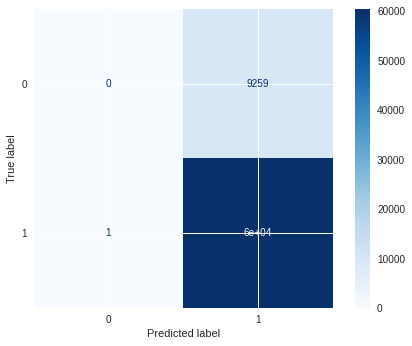

In [ ]:
#Fitting the SVM - Baseline
print('Accuracy for Support Vector Machine model on the training data %.4f' % (score*100))

#confusion_matrix for the training
disp = plot_confusion_matrix(lsvc, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)

Accuracy on the test data 0.8513734607767157
Precision: 0.867
Recall: 0.867
F1 Score: 0.867


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


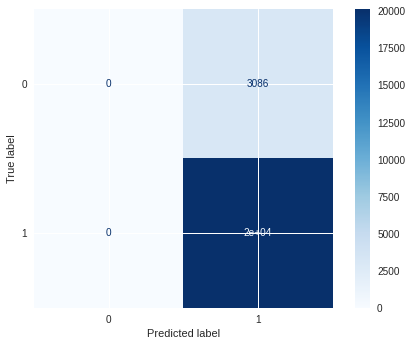

In [ ]:
# Testing the Random Forest Model

#the accuracy on the test data
print('Accuracy on the test data', forest.score(X_test, Y_test))

#Precision, Recall & F1-Score
Y_pred = lsvc.predict(X_test)
print('Precision: %.3f' % precision_score(Y_test, Y_pred, average='micro'))
print('Recall: %.3f' % recall_score(Y_test, Y_pred, average='micro'))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred, average='micro'))

#confusion_matrix for the testing
disp = plot_confusion_matrix(lsvc, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
lsvc = CalibratedClassifierCV(lsvc) 
lsvc.fit(X_train, Y_train)
y_proba = lsvc.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.661105090034052


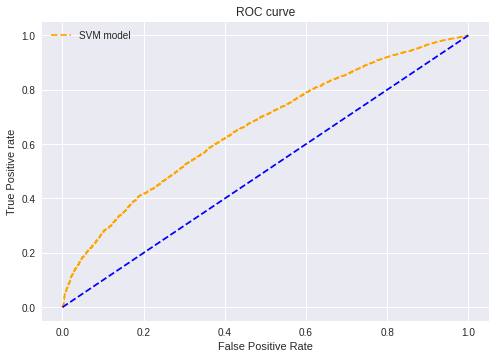

In [ ]:
#ROC curve and AUC value
pred_prob1 = y_proba
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#Crossvalidation

In [ ]:
#crossvalidation : is giving us better accuracy by using non supervised model using KNN and also is suggested to use 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import random
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings('ignore')

SVC = SVC()

from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": LinearSVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}


for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    training_score = cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

#cross_val_score() function will be used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.
#to test the effectiveness of a machine learning models
#cv_results.mean() and cv_results.mean()

Classifiers:  LogisticRegression Has a training score of 87.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 85.0 % accuracy score
Classifiers:  LinearSVC Has a training score of 87.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 77.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 87.0 % accuracy score
